<a href="https://colab.research.google.com/github/silviaalvinia/silviaalvinia.github.io/blob/master/DataCo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis

### Descriptive Data Analysis

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/silviaalvinia/dataset/master/DataCoSupplyChainDataset10k.csv', header = 0)


In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/nathanromora/pancake/master/DataCoSupplyChainDatasetNew.csv', header = 0)


Kode di atas mengambil data supply chain dari github

In [0]:
df.shape

(151338, 16)

Dari hasil, ditemukan bahwa dataset memiliki 53 atribut dan 10520 sampel

In [0]:
df.head(3)

,Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Country,Customer Segment,Department Name,Market,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Sales,Order Item Total,Order Region,Product Price,Shipping Mode
0,91.250000,314.640015,0,73,Puerto Rico,Consumer,Fitness,Pacific Asia,0.04,327.75,1,327.75,314.640015,Southeast Asia,327.75,Standard Class
1,-249.089996,311.359985,1,73,Puerto Rico,Consumer,Fitness,Pacific Asia,0.05,327.75,1,327.75,311.359985,South Asia,327.75,Standard Class
2,-247.779999,309.720001,0,73,EE. UU.,Consumer,Fitness,Pacific Asia,0.06,327.75,1,327.75,309.720001,South Asia,327.75,Standard Class


Melakukan preprocessing pada data, yaitu mengubah data yang berupa kata-kata menjadi kode dengan label encoder dan menghapus fitur yang tidak akan / tidak bisa digunakan untuk analisis seperti data pembeli, data produk, dan tanggal.

In [0]:
#preprocessing
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
df['Customer Country'] = class_le.fit_transform(df['Customer Country'].values)
df['Customer Segment'] = class_le.fit_transform(df['Customer Segment'].values)
#df['Order Country'] = class_le.fit_transform(df['Order Country'].values)
df['Order Region'] = class_le.fit_transform(df['Order Region'].values)
#df['Order Status'] = class_le.fit_transform(df['Order Status'].values)
df['Shipping Mode'] = class_le.fit_transform(df['Shipping Mode'].values)
df['Department Name'] = class_le.fit_transform(df['Department Name'].values)
df['Market'] = class_le.fit_transform(df['Market'].values)
dfd = df
#dfd = df.drop(columns = ['Order Item Profit Ratio','Order Profit Per Order','Order State', 'order date (DateOrders)', 'Category Name','Customer City',	'Customer Country',	'Customer Email',	'Customer Fname',	'Customer Lname',	'Customer Password', 'Customer State',	'Customer Street', 'Department Name',	'Market',	'Order City', 'Product Name',	'shipping date (DateOrders)', 'Customer Id', 'Customer Zipcode', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Id', 'Order Zipcode','Product Card Id', 'Product Description',	'Product Image', 'Product Price', 'Product Status' ])

In [0]:
dfd.head(3)

,Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Country,Customer Segment,Department Name,Market,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Sales,Order Item Total,Order Region,Product Price,Shipping Mode
0,91.250000,314.640015,0,73,1,0,4,3,0.04,327.75,1,327.75,314.640015,15,327.75,3
1,-249.089996,311.359985,1,73,1,0,4,3,0.05,327.75,1,327.75,311.359985,13,327.75,3
2,-247.779999,309.720001,0,73,0,0,4,3,0.06,327.75,1,327.75,309.720001,13,327.75,3


In [0]:
dfd.shape

(151338, 16)

In [0]:
dfd.loc[df['Benefit per order'] >= 0, 'Benefit per order'] = 1
dfd.loc[df['Benefit per order'] < 0, 'Benefit per order'] = 0
dfd.head(3)

,Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Country,Customer Segment,Department Name,Market,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Sales,Order Item Total,Order Region,Product Price,Shipping Mode
0,1.0,314.640015,0,73,1,0,4,3,0.04,327.75,1,327.75,314.640015,15,327.75,3
1,0.0,311.359985,1,73,1,0,4,3,0.05,327.75,1,327.75,311.359985,13,327.75,3
2,0.0,309.720001,0,73,0,0,4,3,0.06,327.75,1,327.75,309.720001,13,327.75,3


In [0]:
dfd.sum()

Benefit per order           1.231910e+05
Sales per customer          2.734027e+07
Late_delivery_risk          8.370100e+04
Category Id                 4.888779e+06
Customer Country            5.341400e+04
Customer Segment            9.587200e+04
Department Name             4.924170e+05
Market                      3.138370e+05
Order Item Discount Rate    1.538956e+04
Order Item Product Price    2.109097e+07
Order Item Quantity         3.206200e+05
Sales                       3.042841e+07
Order Item Total            2.734027e+07
Order Region                1.838368e+06
Product Price               2.109097e+07
Shipping Mode               3.383400e+05
dtype: float64

In [0]:
dfd['Benefit per order'] = dfd['Benefit per order'].apply(np.int64)

In [0]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151338 entries, 0 to 151337
Data columns (total 16 columns):
Benefit per order           151338 non-null int64
Sales per customer          151338 non-null float64
Late_delivery_risk          151338 non-null int64
Category Id                 151338 non-null int64
Customer Country            151338 non-null int64
Customer Segment            151338 non-null int64
Department Name             151338 non-null int64
Market                      151338 non-null int64
Order Item Discount Rate    151338 non-null float64
Order Item Product Price    151338 non-null float64
Order Item Quantity         151338 non-null int64
Sales                       151338 non-null float64
Order Item Total            151338 non-null float64
Order Region                151338 non-null int64
Product Price               151338 non-null float64
Shipping Mode               151338 non-null int64
dtypes: float64(6), int64(10)
memory usage: 18.5 MB


Mencari fitur yang akan dianalisis lebih lanjut, yaitu fitur yang tersebar namun berpola (membentuk beberapa kelompok atau membentuk regresi)

In [0]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

if Version(sklearn_version) < '0.18':
    from sklearn.lda import LDA
else:
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
X, y = dfd.iloc[:, 1:15].values, dfd.iloc[:,0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [0]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

print(utils.multiclass.type_of_target(y_train))

print(utils.multiclass.type_of_target(y_train.astype('int')))

print(utils.multiclass.type_of_target(encoded))


binary
binary
binary


In [0]:
feat_labels = dfd.columns[1:]

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Bobot Fitur')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [0]:
import timeit 
trees = 500
training_time = {}

# fit standard rf
start = timeit.default_timer()
rf = RandomForestClassifier(n_estimators=trees, n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)
training_time['rf_all'] = timeit.default_timer() - start
training_time['rf_important'] = training_time['rf_all']

In [0]:
def top_feat(feature_names, features_importance):
    important_index = sorted(range(len(features_importance)), key=lambda k: features_importance[k])[:22]
    return feature_names[important_index]


rf_feat = top_feat(dfd.columns[4:21], rf.feature_importances_)

print('RF important features: {}'.format(rf_feat))

RF important features: Index(['Delivery Status', 'Order Country', 'Days for shipment (scheduled)',
       'Sales', 'Benefit per order', 'Department Id', 'Order Item Total',
       'Order Item Discount', 'Sales per customer', 'Days for shipping (real)',
       'Order Item Quantity', 'Customer Segment', 'Order Item Discount Rate',
       'Type', 'Category Id', 'Order Item Product Price',
       'Late_delivery_risk'],
      dtype='object')


In [0]:
# test the accuracy of standard random forest
results = {}
prediction = rf.predict(X_test)
results['rf_all'] = accuracy_score(y_test, prediction)

In [0]:

models = {
    'rf_important': rf_feat
}
for model, features in models.items():
    # extract relevant features from train and test
  if Version(sklearn_version) < '0.18':
    X_train_imp = forest.transform(X_train, threshold=0.1)
    X_test_imp = forest.transform(X_test, threshold=0.1)
else:
    from sklearn.feature_selection import SelectFromModel
    sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
    X_train_imp = sfm.transform(X_train)
    X_test_imp = sfm.transform(X_test)


    # fit the rf classifier using only important features
    start = timeit.default_timer()
    rf = RandomForestClassifier(n_estimators=trees, n_jobs=-1, random_state=0)
    rf.fit(X_train_imp, y_train)
    training_time[model] += timeit.default_timer() - start
    # predict on test subset
    prediction = rf.predict(X_test_imp)
    results[model] = accuracy_score(y_test, prediction)

In [0]:
print('** Akurasi Klasifikasi **')
for model, accuracy in results.items():
    print('{}: {} | training time: {}s'.format(model, round(accuracy, 2), round(training_time[model], 2)))

** Akurasi Klasifikasi **
rf_all: 0.79 | training time: 5.5s
rf_important: 0.74 | training time: 8.42s


In [0]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([3.30678337e-01, 1.17760353e-01, 8.65041033e-02, 8.00498894e-02,
       7.69436391e-02, 7.15056734e-02, 7.14877728e-02, 6.50553850e-02,
       5.63859150e-02, 3.99398714e-02, 3.41541717e-03, 2.73643128e-04,
       1.79512875e-32, 1.19226890e-33])

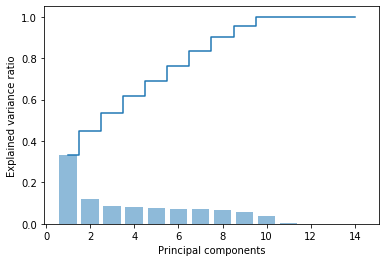

In [0]:
plt.bar(range(1, 15), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 15), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [0]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

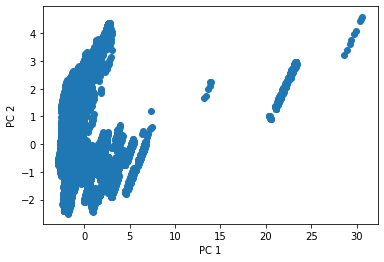

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


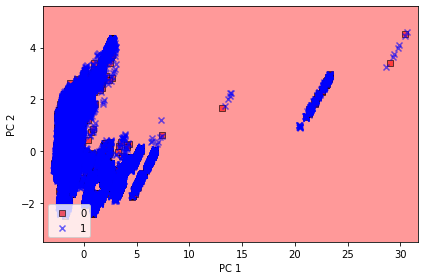

In [0]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [0]:
predictions_pca = lr.predict(X_test_pca)
print("Akurasi:")
print(accuracy_score(y_test, predictions_pca))
print()

Akurasi:
0.8110876172855821



In [0]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
predictions_pca = lr.predict(X_test_pca)
print("Akurasi:")
print(accuracy_score(y_test, predictions_pca))
print()

Akurasi:
0.8110876172855821



In [0]:
import seaborn as sns
sns.pairplot(dfd)

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fcece9d1400> (for post_execute):


KeyboardInterrupt: ignored

Tidak terlihat adanya pengelompokan data maupun regresi yang diharapkan, sehingga tidak dilakukan supervised learning (???????)

## Unsupervised : PCA + KMeans

PCA akan digunakan untuk mereduksi dimensi data, lalu KMeans akan digunakan untuk clustering

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, normalize 
scaler = StandardScaler(); 

In [0]:
scaler = StandardScaler() 
df1_sc = scaler.fit_transform(dfd)  
df1_nl = normalize(df1_sc) 
df1_nl = pd.DataFrame(df1_nl) 

pca = PCA(n_components = 2) 
df1_red = pca.fit_transform(df1_nl)
df1_red = pd.DataFrame(df1_red)

<function matplotlib.pyplot.show>

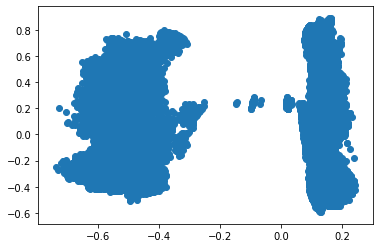

In [0]:
import matplotlib.pyplot as plt
plt.scatter(df1_nl[0],df1_red[1])
plt.show

In [0]:
import numpy as np

a1 = np.array(df1_nl.iloc[0:, 0].values).reshape(-1, 1)
b1 = np.array(df1_red.iloc[0:, 1].values).reshape(-1, 1)
X1 = np.column_stack((a1, b1))

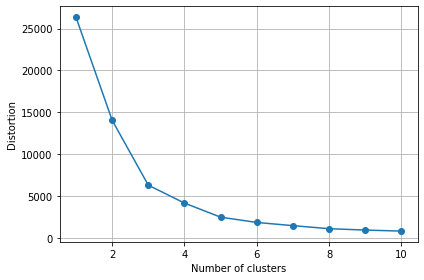

In [0]:
from sklearn.cluster import KMeans
#elbow method
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X1)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid()
plt.tight_layout()
plt.show()


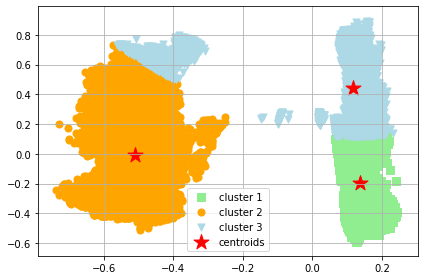

In [0]:
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)

y1_km = km.fit_predict(X1)
plt.scatter(X1[y1_km == 0, 0], X1[y1_km == 0, 1], s=50, c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X1[y1_km == 1, 0], X1[y1_km == 1, 1], s=50, c='orange', marker='o', label='cluster 2')
plt.scatter(X1[y1_km == 2, 0], X1[y1_km == 2, 1], s=50, c='lightblue', marker='v', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, c='red', marker='*', label='centroids')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [0]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

#untuk dataset 1
cluster_labels = np.unique(y1_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X1, y1_km, metric='euclidean')
y1_ax_lower, y1_ax_upper = 0, 0
y1ticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y1_km == c]
    c_silhouette_vals.sort()
    y1_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y1_ax_lower, y1_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    y1ticks.append((y1_ax_lower + y1_ax_upper) / 2.)
    y1_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(y1ticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


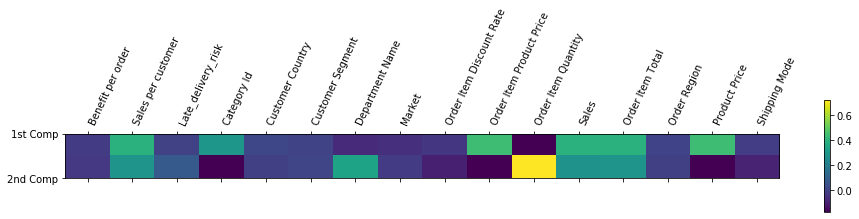

In [0]:
#pca heatmap
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(dfd.columns)),list(dfd.columns),rotation=65,ha='left')
plt.tight_layout()
plt.show()# 
